In [315]:
import os
import itertools
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
stop_words = set(stopwords.words('english')) 

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [289]:
# Data 

# Kagle notebook
# df = pd.read_csv('../input/gender-classifier-DFE-791531.csv', encoding='latin1')

# Jupyter notebook
df = pd.read_csv('twitter_gender_classifier.csv', encoding='latin1')

(20050, 26)


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,gender_gold,link_color,name,profile_yn_gold,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


_unit_id                  20050     0 int64
_golden                       2     0 bool
_unit_state                   2     0 object
_trusted_judgments           32     0 int64
_last_judgment_at           283    50 object
gender                        4    97 object
gender:confidence           923    26 float64
profile_yn                    2     0 object
profile_yn:confidence       267     0 float64
created                   18699     0 object
description               15140  3744 object
fav_number                 6784     0 int64
gender_gold                   6 20000 object
link_color                 3001     0 object
name                      18795     0 object
profile_yn_gold               1 20000 object
profileimage              17164     0 object
retweet_count                22     0 int64
sidebar_color               561     0 object
text                      18412     0 object
tweet_coord                 146 19891 object
tweet_count               14280     0 int64
tweet_created  

None

,_unit_id,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
count,2.005000e+04,20050.000000,20024.000000,20050.000000,20050.000000,20050.000000,2.005000e+04,2.005000e+04
mean,8.157294e+08,3.615711,0.882756,0.993221,4382.201646,0.079401,3.892469e+04,6.587350e+17
std,6.000801e+03,12.331890,0.191403,0.047168,12518.575919,2.649751,1.168371e+05,5.000124e+12
min,8.157192e+08,3.000000,0.000000,0.627200,0.000000,0.000000,1.000000e+00,6.587300e+17
25%,8.157243e+08,3.000000,0.677800,1.000000,11.000000,0.000000,2.398000e+03,6.587300e+17
50%,8.157294e+08,3.000000,1.000000,1.000000,456.000000,0.000000,1.144150e+04,6.587300e+17
75%,8.157345e+08,3.000000,1.000000,1.000000,3315.500000,0.000000,4.002750e+04,6.587400e+17
max,8.157580e+08,274.000000,1.000000,1.000000,341621.000000,330.000000,2.680199e+06,6.587400e+17


female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

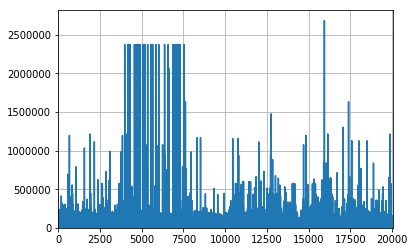

In [290]:
# Exploration

print(df.shape) 
display(df.head(5))

# [print(column) for column in df.columns]
for column in df.columns: # value counts, nans, type
    print('{:25} {:5} {:5} {}'.format(column, len(df[column].value_counts()), len(df[df[column].isna() == True]), df[column].dtype ))

display(df.info())
display(df.describe())

display(df.gender.value_counts()) # pick column

display(df.tweet_count.plot()) # pick numeric column
display(df.tweet_count.hist()) # pick numeric column

In [291]:
# Delete NaN/monolytic/unhelpful features
del df['gender_gold']
del df['profile_yn_gold']
del df['tweet_coord']

# Fill NaN with unknown (as it truly is.)
df.gender = df.gender.fillna('unknown')

# Recode gender to numeric
df['gender'] = df['gender'].map({"female":0, "male":1, "brand":2,"unknown":3}).apply(lambda x: int(x))

# Fill non values.
df['gender:confidence'] = df['gender:confidence'].fillna(0.0) # n=25. We got truly 0.0 confidence here. 
df['_last_judgment_at'] = df['_last_judgment_at'].fillna(df['_last_judgment_at'].mode().iloc[0]) # n=50. Fill with mode, common sence, low impact.

columns_to_recode = ['_golden', '_unit_state', 'profile_yn'] # Recode columns to numeric
le =  LabelEncoder()
for column in columns_to_recode:
    df[column] = le.fit_transform(df[column])

In [292]:
# Get part of speech in tweet as a features 

# tweet as a POS string fg. " NN VBP JJ "
def tweet_pos(tweet):
    words = nltk.word_tokenize(tweet) 
    legit_words = [w for w in words if not w in stop_words]
    pos = [w[1] for w in nltk.pos_tag(legit_words)]
    return ' ' + ' '.join(pos) + ' '

# Get all n>30 POS types
def get_valid_pos_names(pos_column):
    all_pos = list(np.concatenate([v[0].split() for v in pos_column.str.split(';\s')]))
    return np.unique([i for i in all_pos if all_pos.count(i)>30])

df['pos'] = df.text.apply(tweet_pos)
df['pos'] = df.pos.apply(lambda x: ''.join([w for w in x if w.isalpha() or w.isspace()]))

for pos in get_valid_pos_names(df.pos):
    df[pos] = df.pos.str.count(' {} '.format(pos))   

In [322]:
# Support feature. Male, Female = 1, Brand, Unknown = 0.
df['is_human'] = df['gender'].map({0:1,1:1,2:0,3:0})

# Move y(gender) column to be the last one.
df.g = df['gender']
del df['gender']
df['gender'] = df.g

/home/luke/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """


In [323]:
# Problem simplification for baseline model purpose
print(df.shape)
df = df[(df.gender == 0) | (df.gender==1)]
print(df.shape)

(12894, 93)
(12894, 93)


In [324]:
# Features to use for baseline model
features = [ '_trusted_judgments', 'retweet_count', 'tweet_count']
features = pd.concat([df.loc[:, features],df.iloc[:,23:55]],axis=1) # features + POS features.

X = features
y = df['gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [312]:
LGR = LogisticRegression(penalty='l1', 
                         C=1.2, 
                         solver='liblinear').fit(X_train, y_train)

accuracy_train = round(LGR.score(X_train, y_train), 4)
accuracy_test  = round(LGR.score(X_test,  y_test), 4)
predictions = LGR.predict(X_test)
probabilities = LGR.predict_proba(X_test)
tn, fp, fn, tp  = confusion_matrix(y_test, predictions).ravel()

print('Accuracy - train: {}'.format(accuracy_train))
print('Accuracy - test:  {}'.format(accuracy_test))
print('\nConfusion matrix:\nTP: {:<5} TN: {}\nFP: {:<5} FN: {}'.format(tp, tn, fp, fn))
print('\nClassification report: \n\n', classification_report(y_test, predictions))

Accuracy - train: 0.5688
Accuracy - test:  0.5544

Confusion matrix:
TP: 816   TN: 1329
FP: 714   FN: 1010

Classification report: 

               precision    recall  f1-score   support

           0       0.57      0.65      0.61      2043
           1       0.53      0.45      0.49      1826

   micro avg       0.55      0.55      0.55      3869
   macro avg       0.55      0.55      0.55      3869
weighted avg       0.55      0.55      0.55      3869



In [348]:
def add_features(df, split):
    y = df.iloc[:,split:]
    X = df.iloc[:,:split]
    new_X = new_features(X)
    
    return pd.concat( [new_X,y],axis=1)

def new_features(X):
    
    # Text features
    X['tweet_length'] = X.text.apply(lambda x: len(x))
    X['words_number'] = X.text.apply(lambda x: len(x.split(' ')))
    
    # Word features
    positive_words = ['good', 'discover', 'achieve', 'create', 'fresh', 'happy', 'love', 'will']
    negative_words = ['bad', 'evil', 'lame', 'wrong', 'blame', 'never', 'less']
    
    # Some words out of blue
    man_mby = ['sport','football','won','first']
    woman_mby = ['care', 'metoo', 'happy','scared','angry']
    human_mby = ['i', 'me','my','fuck', 'damn', 'shit', 'lol', 'rofl', 'wtf']
    org_mby = ['we', 'our']
    gender_related = ['she','her','his','him','he']
    
    for word in itertools.chain(positive_words, negative_words, man_mby, woman_mby, gender_related, human_mby, org_mby):
        X[word] = X.text.apply(lambda x: 1 if word in x else 0)
    
    # Add
    
    
    
    return X

# Add bag of words features
df.text = df.text.str.lower()
df = add_features(df, 22)
df = df.T.drop_duplicates().T
print(df.shape)
df.head(1)

/home/luke/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/luke/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/luke/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

(12894, 95)


,_unit_id,_golden,_trusted_judgments,_last_judgment_at,gender:confidence,profile_yn,profile_yn:confidence,created,description,fav_number,link_color,name,profileimage,retweet_count,sidebar_color,text,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,tweet_length,words_number,good,discover,achieve,create,fresh,happy,love,will,bad,evil,lame,wrong,blame,never,less,sport,football,won,first,care,metoo,scared,angry,she,her,his,him,he,i,me,my,fuck,damn,shit,lol,wtf,we,our,unknown,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,MD,NN,NNP,NNPS,NNS,POS,PRP,RB,RBR,RBS,RP,SYM,TO,UH,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WRB,gender
0,815719226,0,3,10/26/15 23:24,1,1,1,12/5/13 1:48,i sing my own rhythm.,0,08C2C2,sheezy0,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,robbie e responds to critics after win against...,110964,10/26/15 12:40,6.5873e+17,main; @Kan1shk3,Chennai,109,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,2,4,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [349]:
# Sanity save copy
df_copy_save = df.copy(deep=True)
df_copy_save.to_csv('POSwordskagglebaseline.csv', index=False)

In [350]:
pd.set_option('display.max_columns', 150)
del df['pos']

KeyError: 'pos'

In [386]:
X.columns

Index(['_trusted_judgments', 'retweet_count', 'tweet_count', 'tweet_length',
       'words_number', 'good', 'discover', 'achieve', 'create', 'fresh',
       'happy', 'love', 'will', 'bad', 'evil', 'lame', 'wrong', 'blame',
       'never', 'less', 'sport', 'football', 'won', 'first', 'care', 'metoo',
       'scared', 'angry', 'she', 'her', 'his', 'him', 'he', 'i', 'me', 'my',
       'fuck', 'damn', 'shit', 'lol', 'wtf', 'we', 'our', 'CC', 'CD', 'DT',
       'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS',
       'POS', 'PRP', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD',
       'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WRB'],
      dtype='object')

In [385]:
features.columns

Index(['_trusted_judgments', 'retweet_count', 'tweet_count', 'tweet_length',
       'words_number', 'good', 'discover', 'achieve', 'create', 'fresh',
       'happy', 'love', 'will', 'bad', 'evil', 'lame', 'wrong', 'blame',
       'never', 'less', 'sport', 'football', 'won', 'first', 'care', 'metoo',
       'scared', 'angry', 'she', 'her', 'his', 'him', 'he', 'i', 'me', 'my',
       'fuck', 'damn', 'shit', 'lol', 'wtf', 'we', 'our', 'CC', 'CD', 'DT',
       'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'MD', 'NN', 'NNP', 'NNPS', 'NNS',
       'POS', 'PRP', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD',
       'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WRB'],
      dtype='object')

In [380]:
df['gender'].value_counts()

0    6700
1    6194
Name: gender, dtype: int64

In [405]:
# Problem simplification for baseline model purpose
print(df.shape)
df = df[(df.gender == 0) | (df.gender==1)]
print(df.shape)
# Features to use for baseline model
features = [ '_trusted_judgments', 'retweet_count', 'tweet_count']
features = pd.concat([df.loc[:, features],df.iloc[:,21:93]],axis=1) # features + POS features.

X = features
y = df['gender'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

LGR = LogisticRegression(penalty='l1', 
                         C=1.2, 
                         solver='liblinear')

LGR.fit(X_train, y_train)
accuracy_train = round(LGR.score(X_train, y_train), 4)
accuracy_test  = round(LGR.score(X_test,  y_test), 4)
predictions = LGR.predict(X_test)
probabilities = LGR.predict_proba(X_test)
tn, fp, fn, tp  = confusion_matrix(y_test, predictions).ravel()

print('Accuracy - train: {}'.format(accuracy_train))
print('Accuracy - test:  {}'.format(accuracy_test))
print('\nConfusion matrix:\nTP: {:<5} TN: {}\nFP: {:<5} FN: {}'.format(tp, tn, fp, fn))
print('\nClassification report: \n\n', classification_report(y_test, predictions))

(12894, 94)
(12894, 94)
Accuracy - train: 0.5828
Accuracy - test:  0.5818

Confusion matrix:
TP: 935   TN: 1316
FP: 742   FN: 876

Classification report: 

               precision    recall  f1-score   support

           0       0.60      0.64      0.62      2058
           1       0.56      0.52      0.54      1811

   micro avg       0.58      0.58      0.58      3869
   macro avg       0.58      0.58      0.58      3869
weighted avg       0.58      0.58      0.58      3869



In [244]:
df.gender.value_counts()

0    6700
1    6194
Name: gender, dtype: int64